# First Things first
Taking the same fields in 2019 research and aply it to 2020 data set with the same Algorithms

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
import os

In [2]:
REPORTS_PATH = './Report/'
FINAL_REPORT = './Report/Final-Report.txt'
if not os.path.exists(REPORTS_PATH):
    os.makedirs(REPORTS_PATH)
data = pd.read_csv('data_2020.csv')
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


Point One: The Relationship between coding as a hobby and the salary
Total Paid annually: 3606145279 Per Year
Avg: 103756 Per Year
Average Salary for Hobbyists: 104621 Per Year
Percent ~= 77
Average Salary for None-Hobbyists: 100895 Per Year
Percent ~= 23
Plot Name: Ques-One-Plot.png






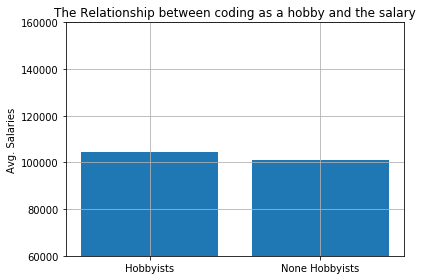

In [3]:
# Ex-Point One: The Relationship between coding as a hobby and the salary
start = time.perf_counter()
salaries = data['ConvertedComp']
total_paid = salaries.sum()
avg_salaries = salaries.mean()
yaxis = [60000, 160000]
salary_hobbyist = data.loc[data['Hobbyist'] == 'Yes', 'ConvertedComp']
total_salary_hobbyist = salary_hobbyist.sum()
avg_salary_hobbyist = salary_hobbyist.mean()

salary_none_hobbyist = data.loc[data['Hobbyist'] == 'No', 'ConvertedComp']
total_salary_none_hobbyist = salary_none_hobbyist.sum()
avg_salary_none_hobbyist = salary_none_hobbyist.mean()

# Ploting Data
fig, ax = plt.subplots()
x = np.arange(2)
Labels = ['Hobbyists', 'None Hobbyists'] # An Empty String because there is no need for xLabel

d = [avg_salary_hobbyist, avg_salary_none_hobbyist]
ax.set_ylabel('Avg. Salaries')
ax.set_ylim(yaxis)
ax.set_title('The Relationship between coding as a hobby and the salary')
plt.xticks(x, Labels)
plt.bar(x, d)
plt.grid()
fig.tight_layout()
PLOT_NAME = 'Ques-One-Plot.png'
fig.savefig(os.path.join(REPORTS_PATH, PLOT_NAME))

#Printing Data
msg = 'Point One: The Relationship between coding as a hobby and the salary\n'
msg += ('Total Paid annually: ' + str(int(total_paid)) + ' Per Year\nAvg: ' + str(int(avg_salaries)) + ' Per Year\n')
msg += ('Average Salary for Hobbyists: ' + str(int(avg_salary_hobbyist)) + ' Per Year\nPercent ~= ' + str(int(total_salary_hobbyist*100/total_paid)) + '\n')
msg += ('Average Salary for None-Hobbyists: ' + str(int(avg_salary_none_hobbyist)) + ' Per Year\nPercent ~= ' + str(int(total_salary_none_hobbyist*100/total_paid + 1)) + '\n') # This One Added to make it logical
msg += ('Plot Name: {}\n\n\n\n'.format(PLOT_NAME))
with open(FINAL_REPORT, 'w') as f:
    f.write(msg)
    f.close()
print(msg)

# In 2020 All the salaries was decreased and the coming plot will explain it

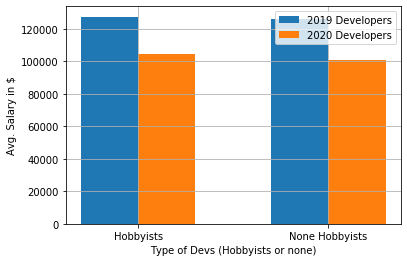

In [13]:
salaries = {"2019": [127380, 126080 ], "2020": [104621, 100895 ]}

width = 0.3
x = np.arange(len(salaries["2019"]))
fig, ax = plt.subplots()

ax.bar(x-width/2, salaries["2019"], width, label="2019 Developers")
ax.bar(x+width/2, salaries["2020"], width, label="2020 Developers")
ax.legend()
ax.set_xlabel("Type of Devs (Hobbyists or none)")
ax.set_ylabel("Avg. Salary in $")
ax.set_xticks(x)
ax.set_xticklabels(["Hobbyists", "None Hobbyists"])
ax.grid(True)

## Beacuse of the current global events and the panademic of Covid-19 Corona Virus The Average salaray (whatever the type) was decresed.

#### For Hobbyists: 
The Hobbyists Devs have lost about 17.87% of thier average annual salary as in 2019 they was paid by ~ 127380$ but it 2020 the average salary is ~ 104621$
#### For None Hobbyists:
The None Hobbyists Devs have lost about 19.98% of thier average annual salary as in 2019 they was paid by ~ 126080$ but it 2020 the average salary is ~ 100895$



### The Second Point will be splitted into two different parts:
##### Part One:
Taking the Most common Five dev types whatever hobbyists or not and get the values fo the same dev types and plot them Toghther P.S: in case there is a type that was not covered in the servey will be printed in Loss field

For None Hobbyists
Type 1 :  Developer, full-stack
Type 2 :  Developer, back-end
Type 3 :  Developer, back-end;Developer, front-end;Developer, full-stack
Type 4 :  Developer, mobile
Type 5 :  Developer, front-end


For Hobbyists
Type 1 :  Data or business analyst;Developer, back-end;Student
Type 2 :  Data or business analyst;Data scientist or machine learning specialist;Product manager
Type 3 :  Developer, back-end;Developer, full-stack;Engineer, data;Engineering manager
Type 4 :  Engineer, data;Engineer, site reliability;System administrator


Loss in Hobbyists:  ['Data or business analyst;Developer, back-end;Student']
Loss in None Hobbyists:  []


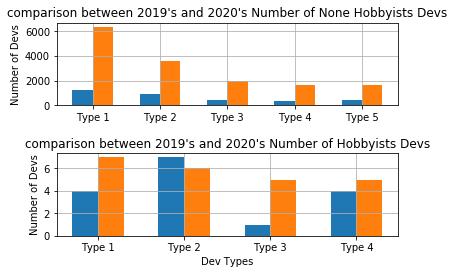

In [131]:
# Rather than applying the same algorithm to this dataset I will take the results and get its numbers and plot them all and laterly I will do that.
# Ex-Point Two: How many people code as a hobby in each DevType

# Hobbyists and non hobbyists most common dev types
hobbyists_devs = ['Data or business analyst;Developer, back-end;Student',
                  'Data or business analyst;Data scientist or machine learning specialist;Product manager',
                  'Developer, back-end;Developer, full-stack;Engineer, data;Engineering manager',
                  'Engineer, data;Engineer, site reliability;System administrator',
                  'Developer, back-end;Developer, front-end;Engineer, data']

none_hobbyists_devs = ['Developer, full-stack', 
                    'Developer, back-end', 
                    'Developer, back-end;Developer, front-end;Developer, full-stack', 
                    'Developer, mobile', 
                    'Developer, front-end']

# First thing get the number for each dev type and create to dataframe's
insights_2019 = {"Hobbyists": [8, 7, 6, 5, 5], "None Hobbyists": [6374, 3557, 1934, 1641, 1607]}
counts = []
loss = {"Hobbyists":[], "None Hobbyists": []}
for dev in hobbyists_devs:
    number = list(data.loc[data["DevType"]== dev, "Hobbyist"].value_counts())
    try:
        counts.append(number[0])
    except IndexError:
        counts.append(0)
        insights_2019["Hobbyists"][hobbyists_devs.index(dev)] = np.nan
        loss["Hobbyists"].append(dev)
hobbyists = pd.DataFrame({"DevType": hobbyists_devs, "2020": counts, "2019": insights_2019["Hobbyists"]})

counts = []
for dev in none_hobbyists_devs:
    number = list(data.loc[data["DevType"]== dev, "Hobbyist"].value_counts())
    try:
        counts.append(number[1])
    except IndexError:
        counts.append(0)
        insights_2019["None Hobbyists"][none_hobbyists_devs.index(dev)] = np.nan
        loss["None Hobbyists"].append(dev)
none_hobbyists= pd.DataFrame({"DevType": none_hobbyists_devs, "2020": counts, "2019": insights_2019["None Hobbyists"]})
fig, axes = plt.subplots(2)
width = 0.3
xticklabels = ["Type 1", "Type 2", "Type 3", "Type 4", "Type 5"]
fig.tight_layout(pad=2.7)

# Plotting None Hobbyists Data
x = np.arange(len(xticklabels))
axes[0].bar(x- width/2, none_hobbyists["2020"], width, label="2020 None Hobbyists")
axes[0].bar(x+ width/2, none_hobbyists["2019"], width, label="2019 None Hobbyists")
axes[0].grid(True)
axes[0].set_xticks(x)
axes[0].set_xticklabels(xticklabels)
axes[0].set_ylabel("Number of Devs")
axes[0].set_title("comparison between 2019's and 2020's Number of None Hobbyists Devs")
print("For None Hobbyists")
for label, dev in zip(xticklabels, none_hobbyists["DevType"]):
    print(label, ": ", dev)


# Plotting Hobbyists Data
xticklabels = xticklabels[0:4]
x = np.arange(len(xticklabels))
axes[1].bar(x- width/2, hobbyists["2020"][1:5], width, label="2020 Hobbyists")
axes[1].bar(x+ width/2, hobbyists["2019"][1:5], width, label="2019 Hobbyists")
axes[1].grid(True)
axes[1].set_xticks(x)
axes[1].set_xticklabels(xticklabels)
axes[1].set_xlabel("Dev Types")
axes[1].set_ylabel("Number of Devs")
axes[1].set_title("comparison between 2019's and 2020's Number of Hobbyists Devs")


print("\n\nFor Hobbyists")
for label, dev in zip(xticklabels, hobbyists["DevType"]):
    print(label, ": ", dev)

print("\n\nLoss in Hobbyists: ", loss["Hobbyists"])
print("There is No loss in non Hobbyists")


##### Part Two:
Applying the same algorithm to 2020 dataset with some changes in indexing and dataframe field in case it is necessary.


In [ ]:
# Point Two: How many people code as a hobby in each DevType
def plt_one():
    # Plotting Hobbyists Developer's Types data
    x = np.arange(len(yes_dataframe))
    count = yes_dataframe['Count']
    fig, ax = plt.subplots()
    ax.set_title('Hobbyists Developer\'s Types')
    ax.bar(x, count)
    ax.set_xticks(x)
    ax.set_xticklabels(devs)
    ax.grid()
    ax.set_xlabel('Dev Type')
    ax.set_ylabel('Count')
    fig.tight_layout()
    PLOT_NAME = 'Ques-Two-Plot-One.png'
    fig.savefig(os.path.join(REPORTS_PATH, PLOT_NAME))
    msg = 'Point Two: How many people code as a hobby in each DevType?\nPart One: For Hobbyists Developers:\n'
    for element in zip(devs, yes_dataframe['Developer']):
        msg += ('{} : {}:\n'.format(element[0], element[1]))
        for innerelemnet in zip(count, no_dataframe.loc[no_dataframe['Developer'] == element[1], 'Count']):
            total = innerelemnet[0] + innerelemnet[1]
            msg += 'Count: {} Out of {} | Percent: {}\n\n'.format(innerelemnet[0], total, innerelemnet[0]*100/total)
    msg += 'Plot Name: {}\n\n\n\n'.format(PLOT_NAME)
    with open(FINAL_REPORT, 'a') as f:
        f.write(msg)
        f.close()

def plt_two():
    # Plotting None Hobbyists Developer's Types data
    count = no_dataframe['Count']        
    x = np.arange(len(no_dataframe))
    fig, ax = plt.subplots()
    ax.set_title('None Hobbyists Developer\'s Types')
    ax.bar(x, count)
    ax.set_xticks(x)
    ax.set_xticklabels(devs)
    ax.set_xlabel('Dev Type')
    ax.set_ylabel('Count')
    fig.tight_layout()
    PLOT_NAME = 'Ques-Two-Plot-Two.png'
    fig.savefig(os.path.join(REPORTS_PATH, PLOT_NAME))
    msg = 'Point Two: How many people code as a hobby in each DevType?\nPart Two: For None Hobbyists Developers:\n'
    for element in zip(devs, no_dataframe['Developer']):
        msg += ('{} : {}:\n'.format(element[0], element[1]))
        for innerelemnet in zip(count, yes_dataframe.loc[no_dataframe['Developer'] == element[1], 'Count']):
            total = innerelemnet[0] + innerelemnet[1]
            msg += 'Count: {} Out of {} | Percent: {}\n\n'.format(innerelemnet[0], total, innerelemnet[0]*100/total)
    msg += 'Plot Name: {}\n\n\n\n'.format(PLOT_NAME)
    with open(FINAL_REPORT, 'a') as f:
        f.write(msg)
        f.close()
                
start = time.perf_counter()
dev_types = data['DevType'].unique()
developers = []
yes = []
no = []

for dev_type in dev_types:
    unique, counts = np.unique(data.loc[data['DevType'] == dev_type, 'Hobbyist'], return_counts=True)
    developers.append(dev_type)
    try:
        yes.append(counts[0])
    except IndexError:
        yes.append(np.nan)
    try:
        no.append(counts[1])    
    except IndexError:
        no.append(np.nan)

df = pd.DataFrame({'Developer': developers, 'Yes_Count': yes, 'No_Count': no})

sorted_by_yes = df.sort_values(by=['Yes_Count'], ascending = False)
sorted_by_no = df.sort_values(by=['No_Count'], ascending = False)
sorted_by_yes.head()
yes_array = []
devs = []
# Modify the data frame to make that there is no confliction between loved and hated types
for dev, yes, no in zip(sorted_by_yes['Developer'], sorted_by_yes['Yes_Count'], sorted_by_yes['No_Count']):
    if yes > no:
        yes_array.append(yes)
        devs.append(dev)
        if len(devs) == 5:
            break
yes_dataframe = pd.DataFrame({'Developer': devs, 'Count': yes_array})

no_array = []
devs = []
# Modify the data frame to make that there is no confliction between loved and hated types
for dev, yes, no in zip(sorted_by_no['Developer'], sorted_by_no['Yes_Count'], sorted_by_no['No_Count']):
    if yes < no:
        no_array.append(no)
        devs.append(dev)
        if len(devs) == 5:
            break
no_dataframe = pd.DataFrame({'Developer': devs, 'Count': no_array})

devs = ['DevType 1', 'DevType 2', 'DevType 3', 'DevType 4', 'DevType 5']

# Plottedd Data
plt_one()
plt_two()
